# Monthly Corn Price Forecasting using Linear Regression

In [1]:
# Project 3      
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import datetime 
import os
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline
from sklearn.linear_model import LinearRegression

## 1. Data Imports, Merges and Cleanup

In [2]:
# Read in corn actual price and sort by date
corn_act_prices = pd.read_csv(Path("../Resources/combined_portfolios_df.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True).sort_index()
# Dropping Natural Gas and Corn Future
corn_act_prices = corn_act_prices.drop(columns=["Natural_Gas_future", "Corn_future"])
corn_act_prices.head(2), corn_act_prices.tail(2)

(            Corn_Price  USD_Index  Ethanol_future  avg_prcp    avg_max  \
 Date                                                                     
 2005-03-28      2.1275  84.620003           1.230  4.255071  14.112571   
 2005-03-29      2.1300  84.320000           1.225  2.576857  18.172214   
 
              avg_min  
 Date                  
 2005-03-28  1.306000  
 2005-03-29  3.058357  ,
             Corn_Price  USD_Index  Ethanol_future  avg_prcp   avg_max  \
 Date                                                                    
 2019-12-30      3.8825  96.739998           1.382  10.56000  8.928214   
 2019-12-31      3.8775  96.389999           1.375   0.54246  2.055286   
 
              avg_min  
 Date                  
 2019-12-30  0.042619  
 2019-12-31 -2.547857  )

In [3]:
# Drop nulls from Corn DataFrame
corn_act_prices.dropna(inplace=True)

In [4]:
# Creating monthly resampling 
monthly_corn_data = corn_act_prices["Corn_Price"].resample('M').mean().to_frame()
monthly_usd_data = corn_act_prices["USD_Index"].resample('M').mean().to_frame()
monthly_eth_data = corn_act_prices["Ethanol_future"].resample('M').mean().to_frame()
monthly_prcp_data = corn_act_prices["avg_prcp"].resample('M').mean().to_frame()
monthly_max_data = corn_act_prices["avg_max"].resample('M').mean().to_frame()
monthly_min_data = corn_act_prices["avg_min"].resample('M').mean().to_frame()
#print sample
monthly_corn_data.shape

(178, 1)

In [5]:
# Merge corn price, usd index, ethanonal data and weather data
monthly_df = pd.concat(
    [monthly_corn_data, monthly_usd_data, monthly_eth_data,monthly_prcp_data,monthly_max_data, monthly_min_data], axis="columns", join="inner"
)
monthly_df
monthly_df.head()

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min
Date,,,,,,
2005-03-31,2.128125,84.322500,1.225000,3.000006,18.027839,3.756143
2005-04-30,2.087071,84.267143,1.178571,3.096576,18.559554,5.861963
2005-05-31,2.119643,85.628095,1.178095,2.559535,21.075347,7.974837
2005-06-30,2.227205,88.442273,1.308864,2.276174,28.863716,16.756437
2005-07-31,2.400875,89.659999,1.660500,3.273311,30.267779,18.144268


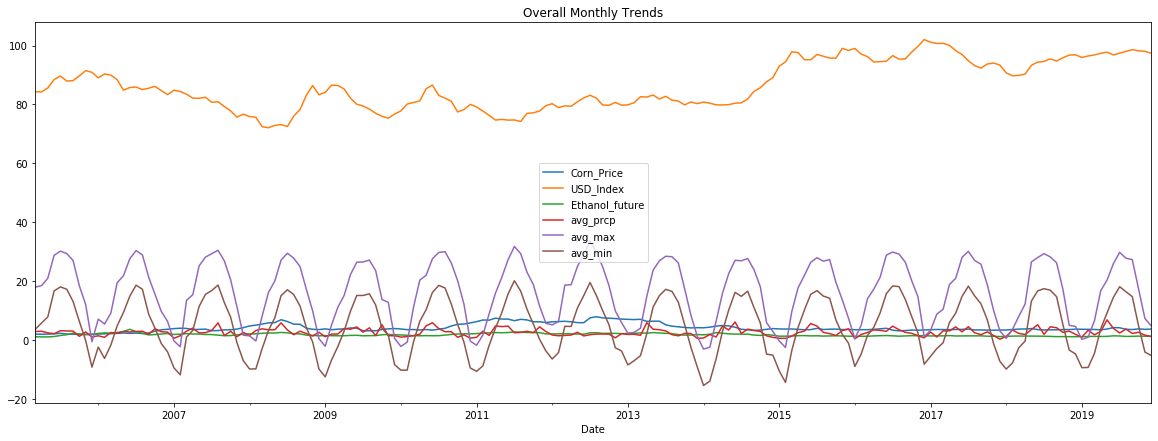

In [6]:
# Plotting and saving the Corn price trends.
monthly_df.dropna().plot(title='Overall Monthly Trends', figsize=(20,7))
plt.savefig("../Images/Overall_Monthly_Trends.png")

In [7]:
# Read in Import and inflation data
monthly_import_inf_df = pd.read_csv(Path("../Resources/monthly_import_inf_df.csv"))
# delete data before March 2005 till Dec 2019
monthly_import_inf_df = monthly_import_inf_df[62:240]
monthly_import_inf_df.head(2) 
# monthly_import_inf_df.tail(10)

,index,China Import,China Inflation Rate,USA Inflation Rate
62,2005-MAR,5166.67,2.60,3.1
63,2005-APR,5166.67,1.78,3.5


In [8]:
# Data Check
monthly_import_inf_df.shape

(178, 4)

In [9]:
# Resetting index 
monthly_df=monthly_df.reset_index()
monthly_df.head(2)

,Date,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min
0,2005-03-31,2.128125,84.322500,1.225000,3.000006,18.027839,3.756143
1,2005-04-30,2.087071,84.267143,1.178571,3.096576,18.559554,5.861963


In [10]:
# Resetting index 
monthly_import_inf_df=monthly_import_inf_df.reset_index()
monthly_import_inf_df.head()

,level_0,index,China Import,China Inflation Rate,USA Inflation Rate
0,62,2005-MAR,5166.67,2.60,3.1
1,63,2005-APR,5166.67,1.78,3.5
2,64,2005-MAY,5166.67,1.68,2.8
3,65,2005-JUN,5166.67,1.58,2.5
4,66,2005-JUL,5166.67,1.78,3.2


In [11]:
# Combining all the monthly data
combined_monthly_df = pd.merge(monthly_df, monthly_import_inf_df, left_index=True, right_index=True)
# Dropping unnecessary columns
combined_monthly_df = combined_monthly_df.drop(columns = ["level_0", "index"])
# Resettng index as "Date"
combined_monthly_df = combined_monthly_df.set_index("Date")
combined_monthly_df.head()

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,China Import,China Inflation Rate,USA Inflation Rate
Date,,,,,,,,,
2005-03-31,2.128125,84.322500,1.225000,3.000006,18.027839,3.756143,5166.67,2.60,3.1
2005-04-30,2.087071,84.267143,1.178571,3.096576,18.559554,5.861963,5166.67,1.78,3.5
2005-05-31,2.119643,85.628095,1.178095,2.559535,21.075347,7.974837,5166.67,1.68,2.8
2005-06-30,2.227205,88.442273,1.308864,2.276174,28.863716,16.756437,5166.67,1.58,2.5
2005-07-31,2.400875,89.659999,1.660500,3.273311,30.267779,18.144268,5166.67,1.78,3.2


## 2. Understanding the Dataset

In [12]:
combined_monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178 entries, 2005-03-31 to 2019-12-31
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Corn_Price            178 non-null    float64
 1   USD_Index             178 non-null    float64
 2   Ethanol_future        178 non-null    float64
 3   avg_prcp              178 non-null    float64
 4   avg_max               178 non-null    float64
 5   avg_min               178 non-null    float64
 6   China Import          178 non-null    float64
 7   China Inflation Rate  178 non-null    float64
 8   USA Inflation Rate    178 non-null    float64
dtypes: float64(9)
memory usage: 13.9 KB


In [13]:
#Construct a correlation table
correlation_table = combined_monthly_df.corr()
correlation_table

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,China Import,China Inflation Rate,USA Inflation Rate
Corn_Price,1.000000,-0.530517,0.528362,0.023230,-0.021669,-0.036657,0.263000,0.467355,0.094020
USD_Index,-0.530517,1.000000,-0.665178,-0.021402,-0.014838,0.000079,0.329281,-0.458526,-0.280683
Ethanol_future,0.528362,-0.665178,1.000000,0.027050,0.080637,0.066401,-0.205852,0.386547,0.467164
avg_prcp,0.023230,-0.021402,0.027050,1.000000,0.504662,0.531735,0.061558,0.078765,0.005900
avg_max,-0.021669,-0.014838,0.080637,0.504662,1.000000,0.993061,-0.052702,0.007215,0.047030
avg_min,-0.036657,0.000079,0.066401,0.531735,0.993061,1.000000,-0.041062,0.001763,0.040760
China Import,0.263000,0.329281,-0.205852,0.061558,-0.052702,-0.041062,1.000000,-0.024932,-0.203077
China Inflation Rate,0.467355,-0.458526,0.386547,0.078765,0.007215,0.001763,-0.024932,1.000000,0.613449
USA Inflation Rate,0.094020,-0.280683,0.467164,0.005900,0.047030,0.040760,-0.203077,0.613449,1.000000


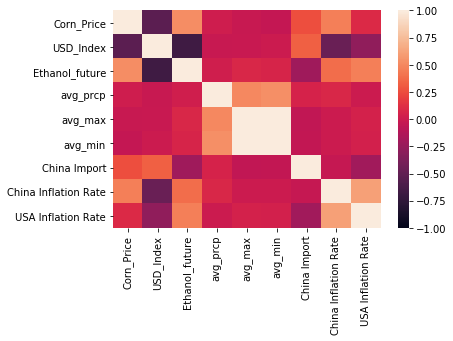

In [14]:
#correlation matrix using a heatmap
sns.heatmap(correlation_table, vmin=-1, vmax=1)

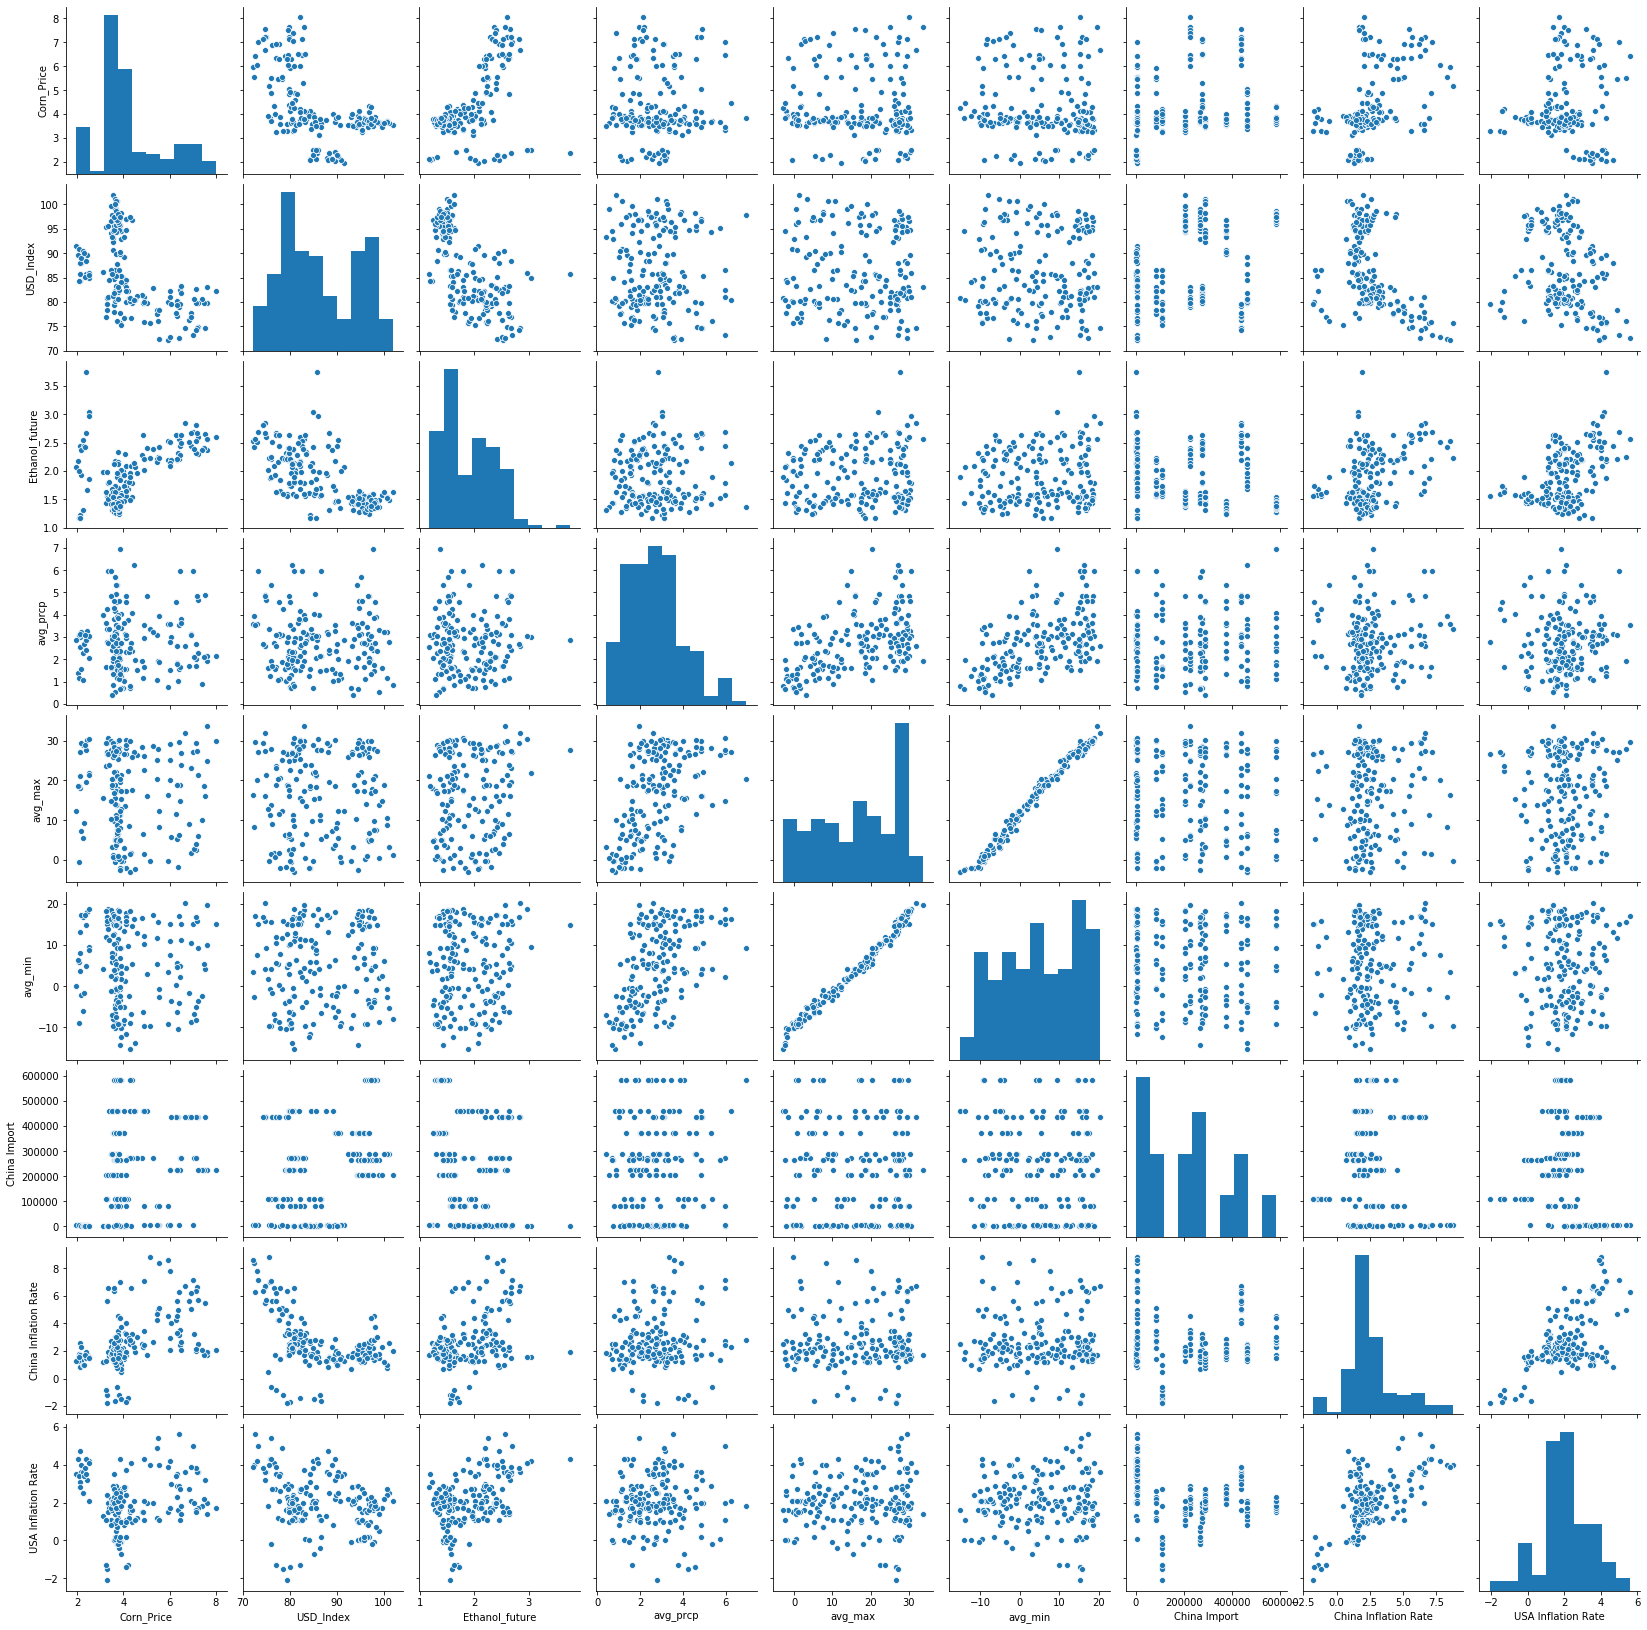

In [15]:
# Looking at the datasets with respect to each variable in pairs
sns.pairplot(combined_monthly_df)

In [16]:
# Checking datasets size
combined_monthly_df.shape

(178, 9)

In [17]:
# Display some sample
combined_monthly_df.head()

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,China Import,China Inflation Rate,USA Inflation Rate
Date,,,,,,,,,
2005-03-31,2.128125,84.322500,1.225000,3.000006,18.027839,3.756143,5166.67,2.60,3.1
2005-04-30,2.087071,84.267143,1.178571,3.096576,18.559554,5.861963,5166.67,1.78,3.5
2005-05-31,2.119643,85.628095,1.178095,2.559535,21.075347,7.974837,5166.67,1.68,2.8
2005-06-30,2.227205,88.442273,1.308864,2.276174,28.863716,16.756437,5166.67,1.58,2.5
2005-07-31,2.400875,89.659999,1.660500,3.273311,30.267779,18.144268,5166.67,1.78,3.2


## 3. Preparing Data for future forecasting

In [18]:
# Creating a lag of 6 months to predict for future six months
combined_monthly_df['Corn_Price_6Mo_Forward']=combined_monthly_df['Corn_Price'].shift(-6)
combined_monthly_df.head(10)

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,China Import,China Inflation Rate,USA Inflation Rate,Corn_Price_6Mo_Forward
Date,,,,,,,,,,
2005-03-31,2.128125,84.322500,1.225000,3.000006,18.027839,3.756143,5166.67,2.60,3.1,2.098810
2005-04-30,2.087071,84.267143,1.178571,3.096576,18.559554,5.861963,5166.67,1.78,3.5,2.020595
2005-05-31,2.119643,85.628095,1.178095,2.559535,21.075347,7.974837,5166.67,1.68,2.8,1.944275
2005-06-30,2.227205,88.442273,1.308864,2.276174,28.863716,16.756437,5166.67,1.58,2.5,2.082976
2005-07-31,2.400875,89.659999,1.660500,3.273311,30.267779,18.144268,5166.67,1.78,3.2,2.133875
2005-08-31,2.164543,87.940870,1.927130,3.206406,29.450363,17.352199,5166.67,1.28,3.6,2.241211
2005-09-30,2.098810,88.080000,2.446429,3.139405,27.099840,13.230418,5166.67,0.87,4.7,2.278804
2005-10-31,2.020595,89.721904,2.182000,1.378444,18.527934,6.433771,5166.67,1.28,4.3,2.379974
2005-11-30,1.944275,91.464501,2.070500,2.874517,12.203607,-0.010596,5166.67,1.28,3.5,2.499545


In [19]:
#Preparing the data for future forecast of 90 days
forecast_6 = combined_monthly_df[-6:]
forecast_6.head(3)

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,China Import,China Inflation Rate,USA Inflation Rate,Corn_Price_6Mo_Forward
Date,,,,,,,,,,
2019-07-31,4.275952,97.396190,1.495238,2.508465,29.849720,18.208775,583333.33,2.76,1.8,NaN
2019-08-31,3.772136,98.004545,1.350091,3.842141,27.865768,16.484397,583333.33,2.83,1.7,NaN
2019-09-30,3.678250,98.602499,1.373100,2.354592,27.389887,14.837526,583333.33,3.00,1.7,NaN


In [20]:
# Drop nulls from Corn DataFrame
combined_monthly_df.dropna(inplace=True)
combined_monthly_df.head()

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,China Import,China Inflation Rate,USA Inflation Rate,Corn_Price_6Mo_Forward
Date,,,,,,,,,,
2005-03-31,2.128125,84.322500,1.225000,3.000006,18.027839,3.756143,5166.67,2.60,3.1,2.098810
2005-04-30,2.087071,84.267143,1.178571,3.096576,18.559554,5.861963,5166.67,1.78,3.5,2.020595
2005-05-31,2.119643,85.628095,1.178095,2.559535,21.075347,7.974837,5166.67,1.68,2.8,1.944275
2005-06-30,2.227205,88.442273,1.308864,2.276174,28.863716,16.756437,5166.67,1.58,2.5,2.082976
2005-07-31,2.400875,89.659999,1.660500,3.273311,30.267779,18.144268,5166.67,1.78,3.2,2.133875


In [21]:
#Display sample
combined_monthly_df.tail()

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,China Import,China Inflation Rate,USA Inflation Rate,Corn_Price_6Mo_Forward
Date,,,,,,,,,,
2019-02-28,3.747789,96.458421,1.324632,3.443012,1.072401,-9.174665,583333.33,1.50,1.5,3.772136
2019-03-31,3.711071,96.804285,1.363857,1.889106,6.659354,-4.407710,583333.33,2.28,1.9,3.678250
2019-04-30,3.586167,97.358572,1.324000,3.064316,16.871515,3.968828,583333.33,2.57,2.0,3.897717
2019-05-31,3.836705,97.745454,1.367182,6.964451,20.452727,9.335889,583333.33,2.76,1.8,3.744158
2019-06-30,4.357575,96.806001,1.544450,4.067033,25.996179,14.580604,583333.33,2.67,1.6,3.830250


In [22]:
# Data checks
combined_monthly_df.shape

(172, 10)

## 4. Training and Validation Datasplit

In [23]:
# Train Test Split of 80% 20%
train = combined_monthly_df.loc['2005-03-28':'2016-09-30']
test = combined_monthly_df.loc['2016-10-31':]
train.shape, train.tail(2), test.shape, test.head(2)

((139, 10),
             Corn_Price  USD_Index  Ethanol_future  avg_prcp    avg_max  \
 Date                                                                     
 2016-08-31    3.240696  95.380000        1.430130  3.635267  29.285728   
 2016-09-30    3.337500  95.465238        1.508857  2.717000  26.518333   
 
               avg_min  China Import  China Inflation Rate  USA Inflation Rate  \
 Date                                                                            
 2016-08-31  18.233216     205333.33                  1.29                 1.1   
 2016-09-30  13.891024     205333.33                  1.89                 1.5   
 
             Corn_Price_6Mo_Forward  
 Date                                
 2016-08-31                3.699737  
 2016-09-30                3.656848  ,
 (33, 10),
             Corn_Price  USD_Index  Ethanol_future  avg_prcp    avg_max  \
 Date                                                                     
 2016-10-31     3.49800  97.738999        

## 5. Prepare the Features (X) and the Target (y)

In [24]:
# Create dataframes for X_train and X_test and series for y_train and y_test
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train.drop(columns=["Corn_Price_6Mo_Forward"])
X_test = test.drop(columns=["Corn_Price_6Mo_Forward"])
y_train = train["Corn_Price_6Mo_Forward"]
y_test = test["Corn_Price_6Mo_Forward"]

In [25]:
# Dispaly some sample
X_train.head(3)

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,China Import,China Inflation Rate,USA Inflation Rate
Date,,,,,,,,,
2005-03-31,2.128125,84.322500,1.225000,3.000006,18.027839,3.756143,5166.67,2.60,3.1
2005-04-30,2.087071,84.267143,1.178571,3.096576,18.559554,5.861963,5166.67,1.78,3.5
2005-05-31,2.119643,85.628095,1.178095,2.559535,21.075347,7.974837,5166.67,1.68,2.8


In [26]:
# Dispaly some sample
y_train[:3], y_test[:3]

(Date
 2005-03-31    2.098810
 2005-04-30    2.020595
 2005-05-31    1.944275
 Name: Corn_Price_6Mo_Forward, dtype: float64,
 Date
 2016-10-31    3.638342
 2016-11-30    3.705455
 2016-12-31    3.731818
 Name: Corn_Price_6Mo_Forward, dtype: float64)

In [27]:
# Dispaly some sample
X_test.head(3)

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,China Import,China Inflation Rate,USA Inflation Rate
Date,,,,,,,,,
2016-10-31,3.498000,97.738999,1.586150,2.397624,20.332411,8.164248,205333.33,2.20,1.6
2016-11-30,3.463350,99.705500,1.574450,1.597382,14.831445,2.562969,205333.33,2.30,1.7
2016-12-31,3.535952,102.013333,1.626667,0.863265,1.274076,-8.072622,205333.33,1.99,2.1


In [28]:
# Data Checks
y_train.dtype, y_test.dtype

(dtype('float64'), dtype('float64'))

## 6. Linear Regression Model Development

In [29]:
#Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[ 4.85615732e-01 -2.79037767e-02  1.85852041e-01 -2.25180769e-01
  3.89821682e-02 -2.03981638e-02 -5.09113423e-07  2.91674835e-01
 -3.52376137e-01]
4.3715102136742665


## 7. Future Forecast

In [30]:
#Looking at the model parameters in dataframe
pd.DataFrame(model.coef_, X_train.columns, columns = ['Coeff'])

,Coeff
Corn_Price,4.856157e-01
USD_Index,-2.790378e-02
Ethanol_future,1.858520e-01
avg_prcp,-2.251808e-01
avg_max,3.898217e-02
avg_min,-2.039816e-02
China Import,-5.091134e-07
China Inflation Rate,2.916748e-01
USA Inflation Rate,-3.523761e-01


In [31]:
# Next 6 Months prediction
forecast_6 = forecast_6.drop(columns=["Corn_Price_6Mo_Forward"])
predictions_6 = model.predict(forecast_6)
predictions_6

array([4.10923722, 3.53379712, 3.87538986, 3.91418424, 3.97366513,
       3.94591078])

In [32]:
monthly_forecast =  pd.DataFrame(predictions_6, columns = ['Corn Price Forecast'])
monthly_forecast.to_csv("../Resources/monthly_forecast.csv")

## 8. Make predictions using the Testing Data
Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [33]:
# And make a prediction of "y" values for just the test dataset
predictions = model.predict(X_test)
predictions

array([3.69720791, 3.6972792 , 3.3002338 , 2.91977944, 2.91494504,
       2.61601282, 2.95988169, 2.98189468, 3.68154011, 3.28123885,
       3.64657373, 3.68133034, 3.34981524, 3.32578406, 3.54362557,
       3.22244763, 3.30538893, 3.39058338, 3.5009962 , 3.21367237,
       2.63021796, 3.45554909, 2.95836568, 3.16288493, 3.33195728,
       2.9012989 , 3.26459233, 3.36048363, 2.811743  , 3.34857142,
       3.27698105, 2.6736594 , 3.79154269])

In [34]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Return"] = predictions
Results.head(3)

,Corn_Price_6Mo_Forward,Predicted Return
Date,,
2016-10-31,3.638342,3.697208
2016-11-30,3.705455,3.697279
2016-12-31,3.731818,3.300234


In [35]:
# Display top 3 rows
Results.head(3), Results.tail(3)

(            Corn_Price_6Mo_Forward  Predicted Return
 Date                                                
 2016-10-31                3.638342          3.697208
 2016-11-30                3.705455          3.697279
 2016-12-31                3.731818          3.300234,
             Corn_Price_6Mo_Forward  Predicted Return
 Date                                                
 2019-04-30                3.897717          3.276981
 2019-05-31                3.744158          2.673659
 2019-06-30                3.830250          3.791543)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D50BAB33C8>,
      dtype=object)

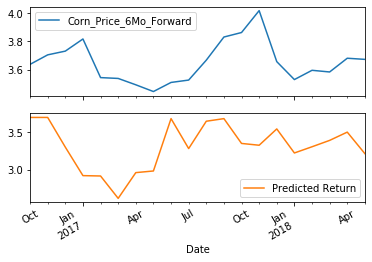

In [36]:
# Plot the first 20 predictions against the true values to see how it performed
# The trends lines should be similar
Results[:20].plot(subplots=True)

## 9. Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [37]:
from sklearn.metrics import mean_squared_error

# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# A "good" MSE score will be close to zero.
mse = mean_squared_error(Results["Corn_Price_6Mo_Forward"],Results["Predicted Return"])
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)

# Print the MSE, RMSE and standard deviation
print(f"Mean Squared Error (MSE): {mse}")
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation of Futures Return: {np.std(Results.Corn_Price_6Mo_Forward)}")

Mean Squared Error (MSE): 0.3645404968209457
Out-of-Sample Root Mean Squared Error (RMSE): 0.6037718913803007
Standard Deviation of Futures Return: 0.1980472092755349


## 10. In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [38]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(in_sample_results["Corn_Price_6Mo_Forward"],in_sample_results["In-sample Predictions"]
)
# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)

in_sample_rmse = np.sqrt(in_sample_mse)
# Print the mser, rmse, and standard deviation
print(f"Mean Squared Error (MSE): {mse}")
print(f"In-sample Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation of Futures Return: {np.std(in_sample_results.Corn_Price_6Mo_Forward)}")

Mean Squared Error (MSE): 0.3645404968209457
In-sample Root Mean Squared Error (RMSE): 0.6037718913803007
Standard Deviation of Futures Return: 1.4966651591792786
